In [14]:
%load_ext autoreload
%autoreload 2

from toolz import take
import torch as th
from torch.utils.data import DataLoader
from torch import tensor, optim, nn
from torch.nn import functional as F
import matplotlib.pyplot as plt
%matplotlib inline

from wxml.model import MLP
from wxml.hamming import make_data_hamming, wt
from wxml.data import make_splits
from wxml.train import train

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
xs, ys = make_data_hamming(100000)

[print(xy) for xy in take(5, zip(xs, ys))]

ds_train, ds_val, ds_test = make_splits(xs, ys)
train_loader, val_loader, test_loader = [DataLoader(d, batch_size=32, shuffle=False) for d in [ds_train, ds_val, ds_test]]

(tensor([0., 0., 1., 0., 1., 0., 0., 0.], requires_grad=True), tensor([0., 0., 0., 0., 0., 0., 1., 0.], requires_grad=True))
(tensor([0., 0., 0., 1., 0., 1., 0., 1.], requires_grad=True), tensor([0., 0., 0., 0., 0., 0., 1., 1.], requires_grad=True))
(tensor([0., 0., 0., 1., 1., 1., 1., 1.], requires_grad=True), tensor([0., 0., 0., 0., 0., 1., 0., 1.], requires_grad=True))
(tensor([0., 0., 1., 0., 0., 1., 0., 0.], requires_grad=True), tensor([0., 0., 0., 0., 0., 0., 1., 0.], requires_grad=True))
(tensor([0., 0., 0., 1., 0., 1., 1., 1.], requires_grad=True), tensor([0., 0., 0., 0., 0., 1., 0., 0.], requires_grad=True))


In [16]:
num_layers = 2
input_dim = 8
hidden_dim = 32
output_dim = 8

lr = 1e-3

model = nn.Sequential(MLP(num_layers, input_dim, hidden_dim, output_dim), nn.Sigmoid())
opt = optim.SGD(model.parameters(), lr=lr)
loss_fn = F.binary_cross_entropy

# number of SAMPLES classified correctly, NOT the number of bits
def bitvector_classification_accuracy(y_pred, y):
    return (y_pred.round() == y).float().mean()

In [17]:
epochs = 10

model = th.compile(model)
model.train()
losses, accuracies, val_losses, val_accuracies = train(model, loss_fn, opt, train_loader, val_loader, epochs=epochs, acy_fn=bitvector_classification_accuracy)

loss: 0.261, acy: 0.000: 100%|██████████| 10/10 [00:09<00:00,  1.00it/s]


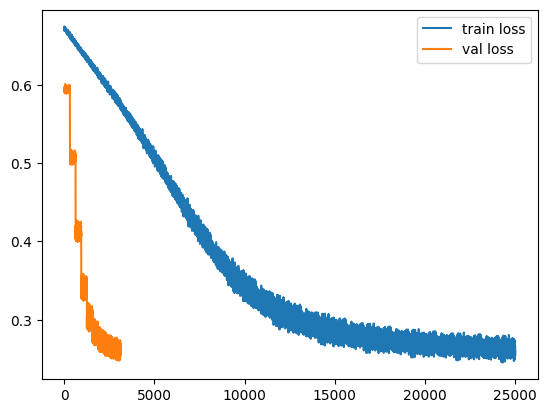

In [19]:
plt.plot(losses, label='train loss')
plt.plot(val_losses, label='val loss')
plt.legend()

In [ ]:
th.set_printoptions(sci_mode=False)
model(x)